## Overview
Plot graph for check normality, variance equality, sample independence, and numerical data validity for ANOVA.

### Objective
### Preliminary Analysis
**1. Distribution (Normality)**
- We’ll use the **Shapiro-Wilk Test** to test for normality in the data distribution for each age group and plan type **(PlanType)**.
- The test results will indicate whether **p-value > 0.05**, which signifies that the data follows a normal distribution.

**2. Homogeneity of Variance**
- Use **Levene’s Test** to examine the equality of variances across groups, checking whether **p-value > 0.05**.
- If the p-value is greater than 0.05, it indicates that the variances are equal among the groups.

**3. Independence**
- Sample independence depends on the data collection method, ensuring that each sample is not related to others.

**4. Data Characteristics (Numerical Data)**
- Verify that **Copayment** is a **numerical variable** suitable for conducting an **ANOVA** test.

### 1. Loading and inspecting dataset
#### import library
1. pandas that it allows you to create, manipulate, and analyze datasets efficiently.
2. numpy that it provides support for arrays, matrices, and various mathematical functions.
3. seaborn that it provides high-level functions to create attractive and informative plots.
4. matplotlib is a foundational library for creating static, interactive, and animated visualizations.
5. scipy.stats for a variety of statistical tests such as t-tests, ANOVA, and probability calculations.
6. statsmodels.stats.weightstats used for hypothesis testing, such as z-tests and t-tests, where the weight of the data is taken into account.
7. To check the equality of variances between different groups.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats import weightstats as stests
from scipy.stats import levene

   Unnamed: 0 AgeGroup  Age   PlanType  Copayment
0           0     0-20   20        PPO        0.0
1         658     0-20   20        PPO        0.0
2         659     0-20   20  Indemnity        0.0
3         660     0-20   20        PPO        0.0
4         661     0-20   20        EPO        0.0


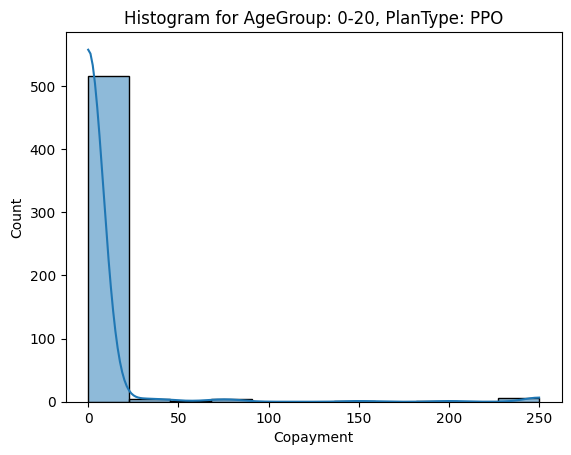

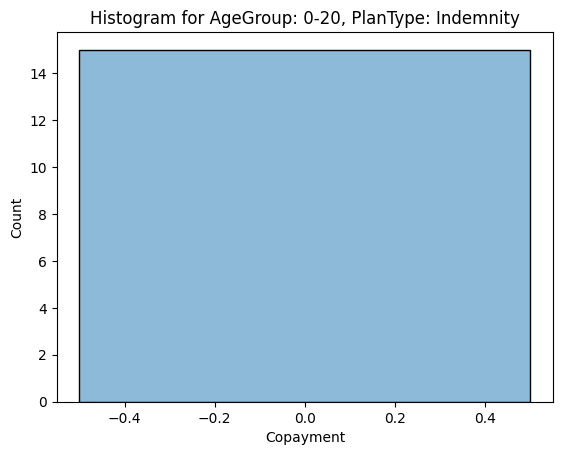

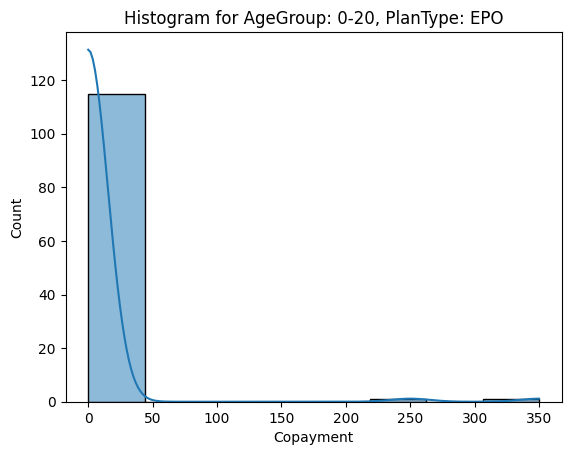

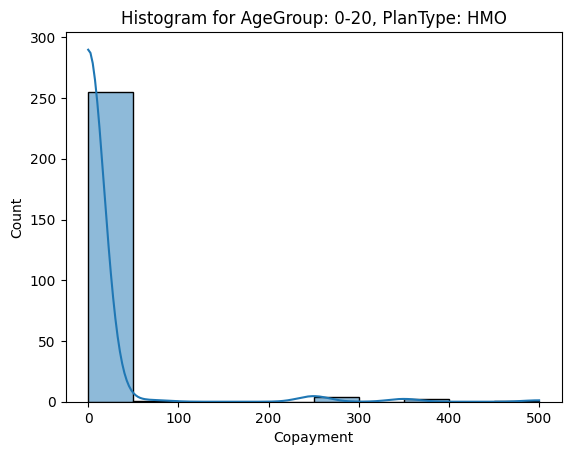

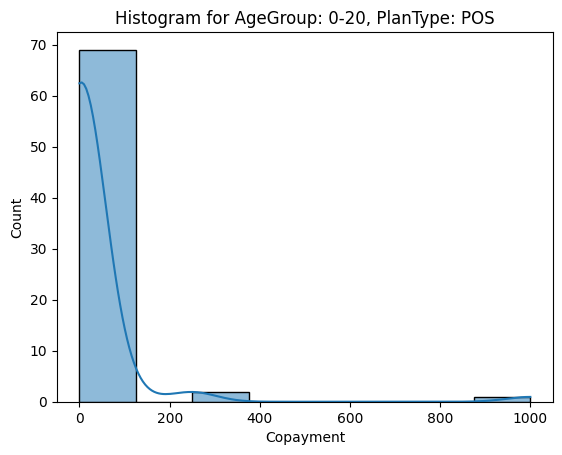

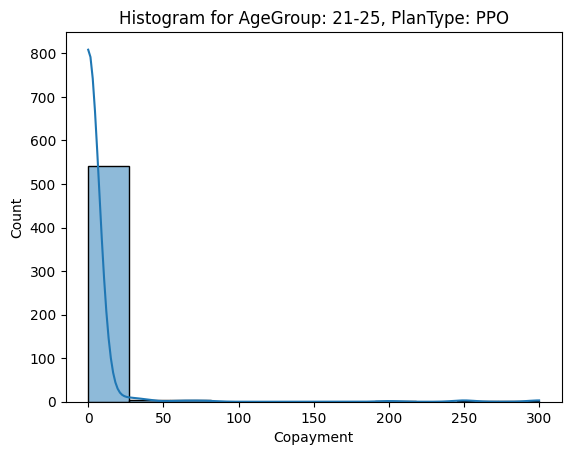

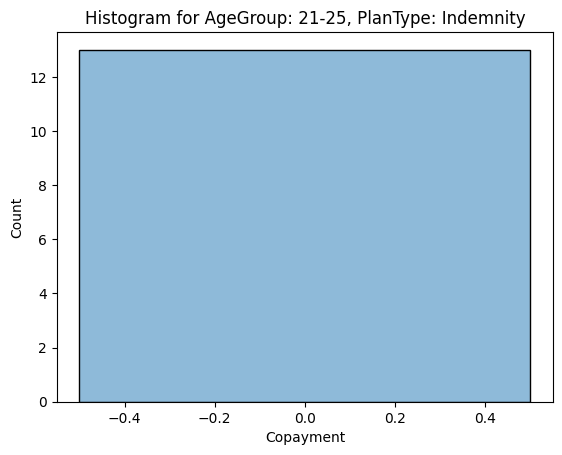

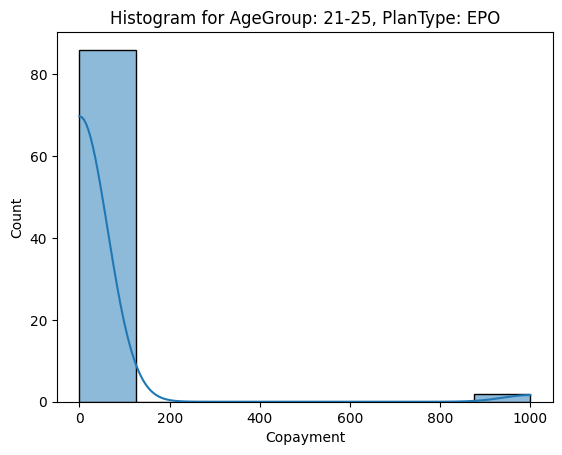

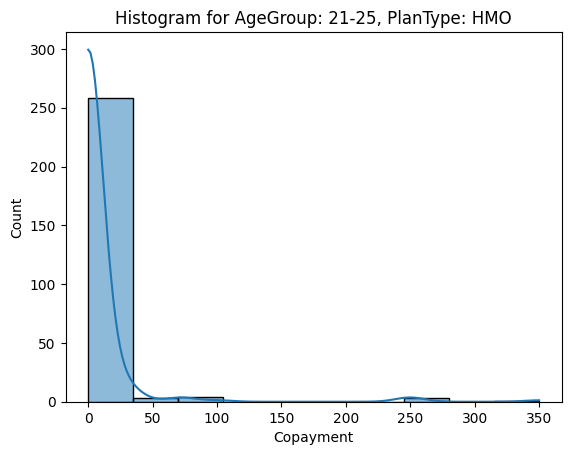

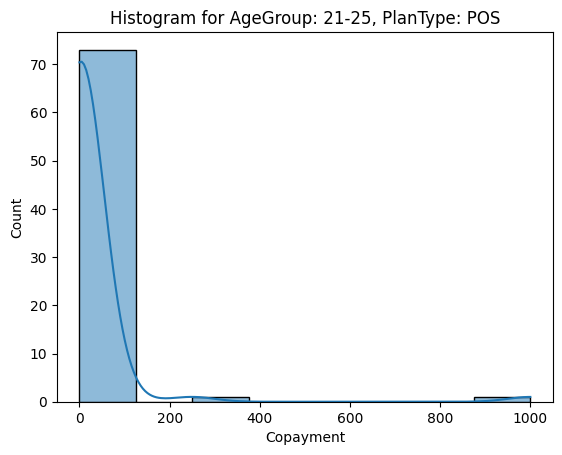

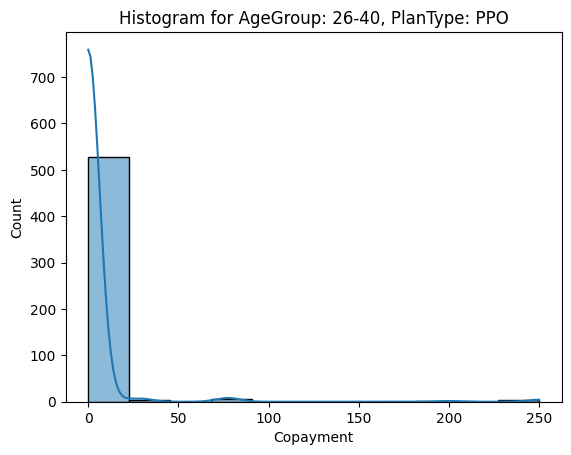

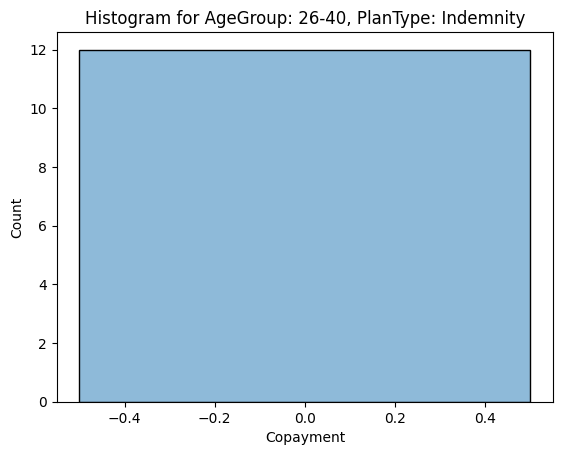

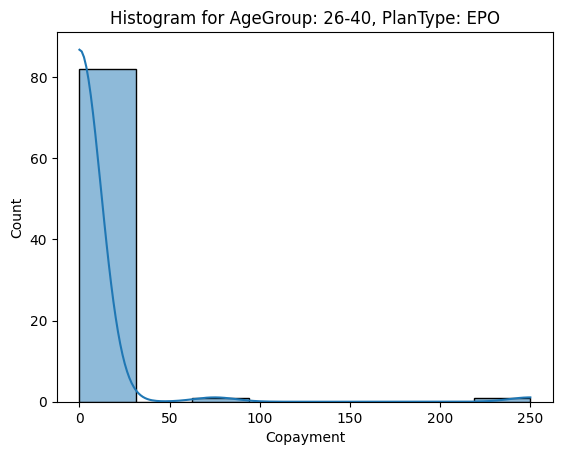

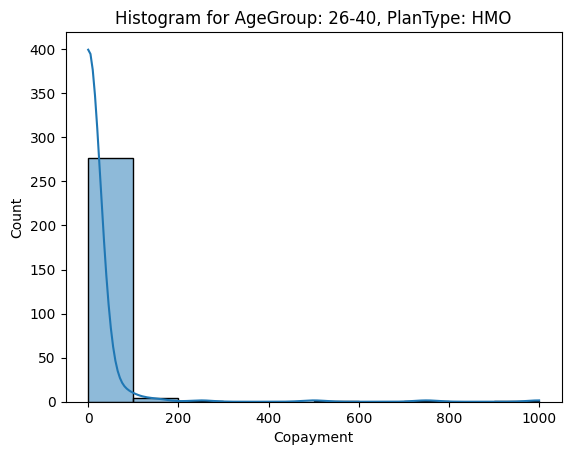

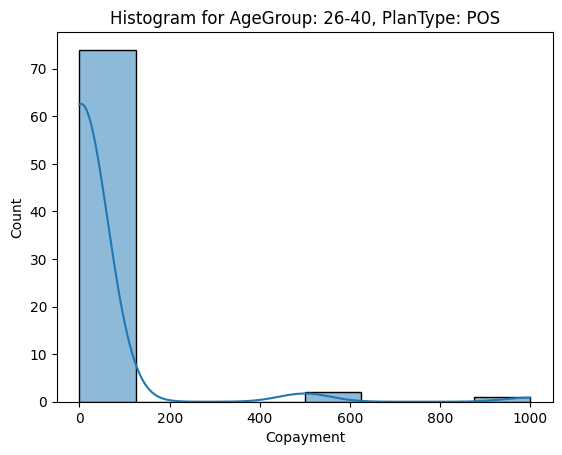

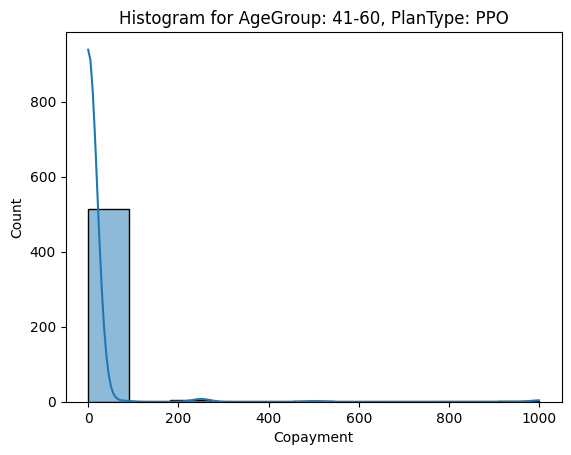

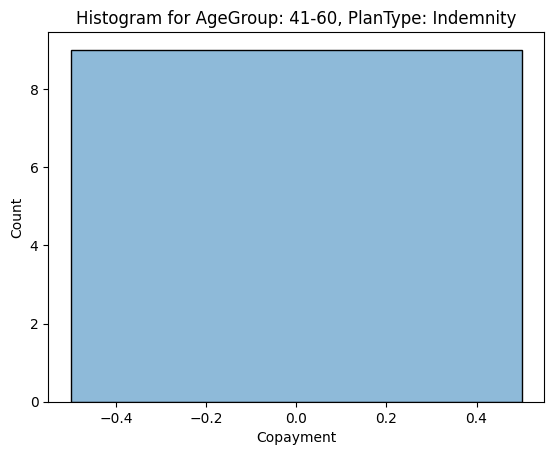

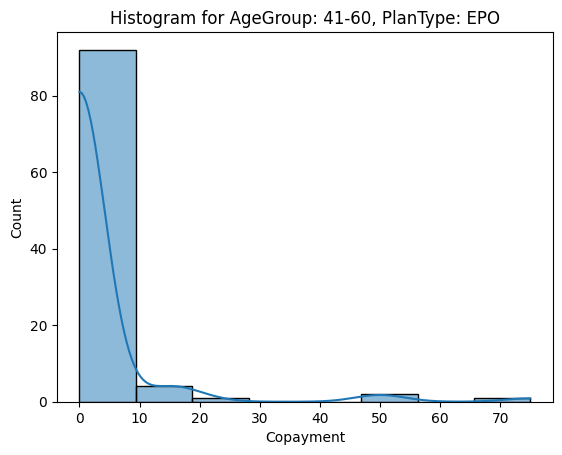

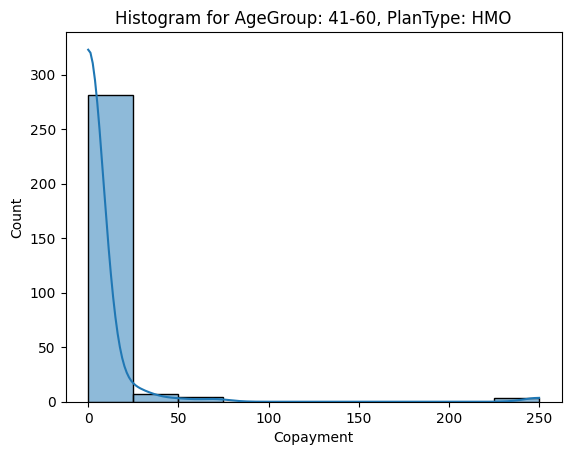

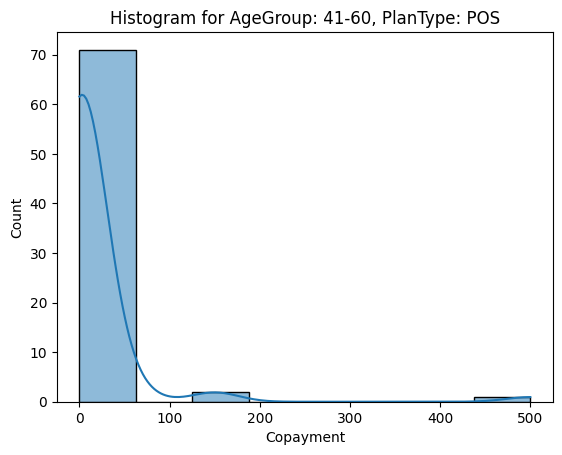

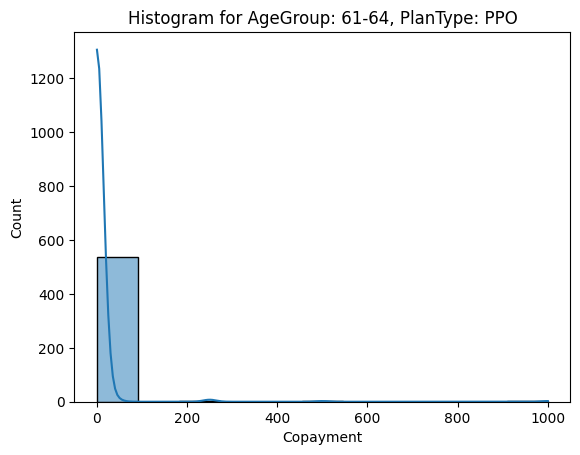

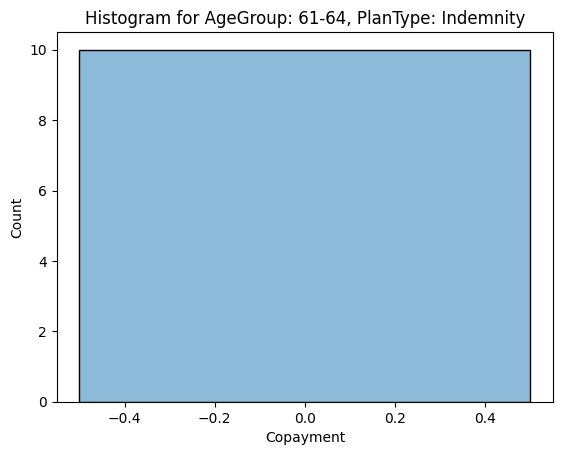

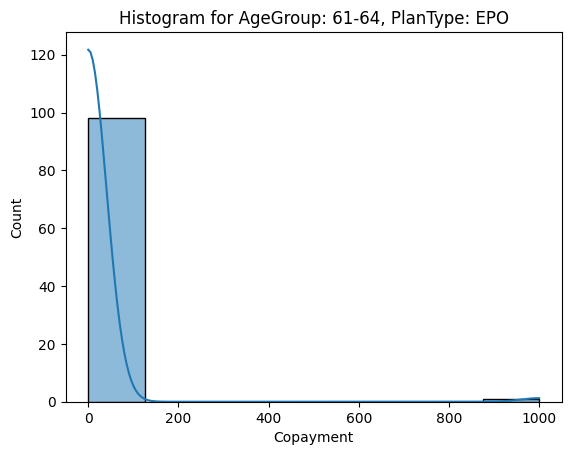

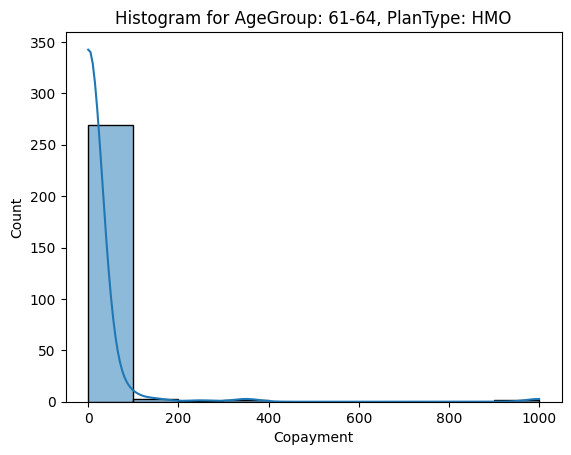

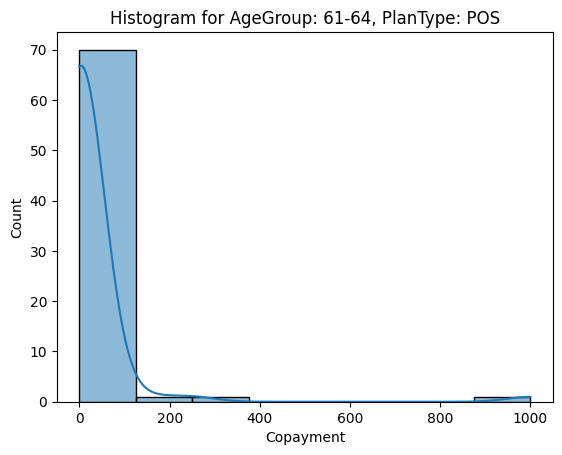

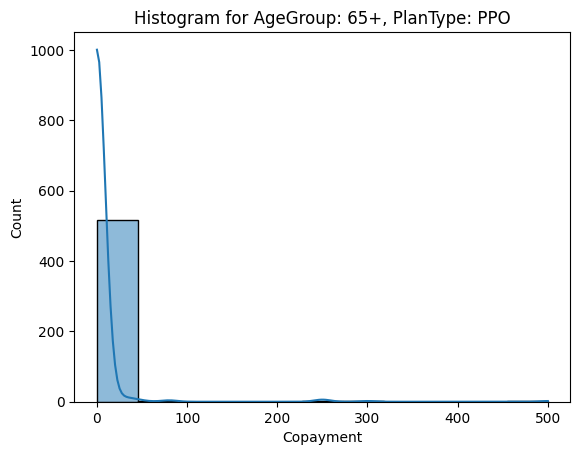

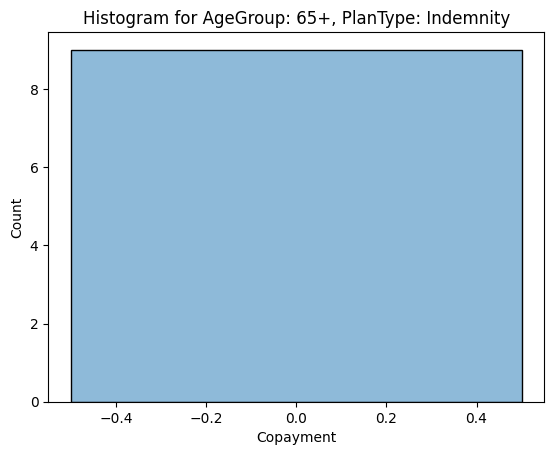

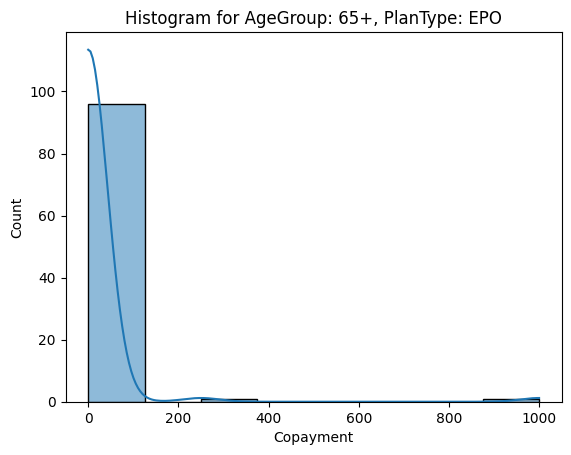

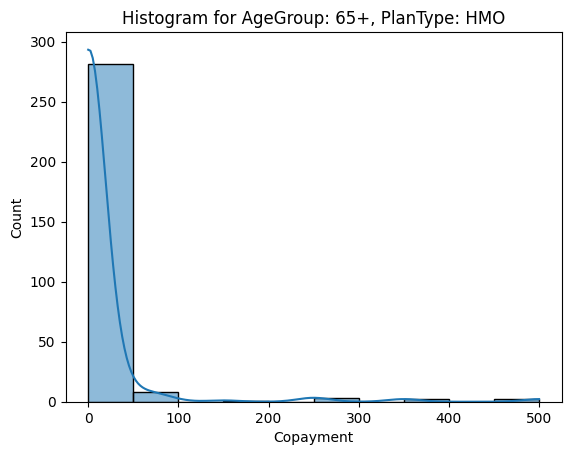

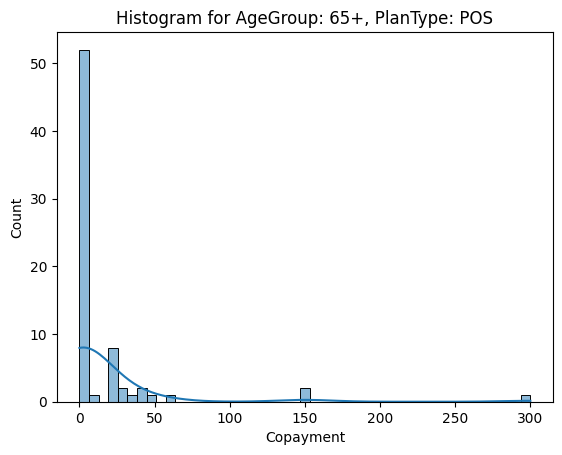

In [2]:
# Load the dataset from Binning-Use.ipynb
df = pd.read_csv('final_binning.csv')

# Show basic information
print(df.head())

# 1. Check the distribution of data (Normality)
# We will check normality for each age group and plan type (PlanType)

# Select the column you want to test
age_groups = df['AgeGroup'].unique()  # AgeGroup
plan_types = df['PlanType'].unique()  # PlanType

# Draw a histogram for checking dispersion
for age in age_groups:
    for plan in plan_types:
        subset = df[(df['AgeGroup'] == age) & (df['PlanType'] == plan)]
        sns.histplot(subset['Copayment'], kde=True)
        plt.title(f'Histogram for AgeGroup: {age}, PlanType: {plan}')
        plt.show()

In [21]:
# Dispersion was tested by Shapiro-Wilk test (for normality)
for age in age_groups:
    for plan in plan_types:
        subset = df[(df['AgeGroup'] == age) & (df['PlanType'] == plan)]
        stat, p_value = stats.shapiro(subset['Copayment'])
        print(f'Shapiro-Wilk Test for AgeGroup: {age}, PlanType: {plan}, p-value: {p_value}')
        if p_value > 0.05:
            print("Data is approximately normal.")
        else:
            print("Data is not normal.")

Shapiro-Wilk Test for AgeGroup: 0-20, PlanType: PPO, p-value: 1.128251810261071e-43
Data is not normal.
Shapiro-Wilk Test for AgeGroup: 0-20, PlanType: Indemnity, p-value: 1.0
Data is approximately normal.
Shapiro-Wilk Test for AgeGroup: 0-20, PlanType: EPO, p-value: 1.925712056837475e-23
Data is not normal.
Shapiro-Wilk Test for AgeGroup: 0-20, PlanType: HMO, p-value: 1.7734133768755947e-32
Data is not normal.
Shapiro-Wilk Test for AgeGroup: 0-20, PlanType: POS, p-value: 1.1151854903326577e-17
Data is not normal.
Shapiro-Wilk Test for AgeGroup: 21-25, PlanType: PPO, p-value: 6.780583519351424e-45
Data is not normal.
Shapiro-Wilk Test for AgeGroup: 21-25, PlanType: Indemnity, p-value: 1.0
Data is approximately normal.
Shapiro-Wilk Test for AgeGroup: 21-25, PlanType: EPO, p-value: 2.873482883044781e-20
Data is not normal.
Shapiro-Wilk Test for AgeGroup: 21-25, PlanType: HMO, p-value: 1.9653483191547088e-32
Data is not normal.
Shapiro-Wilk Test for AgeGroup: 21-25, PlanType: POS, p-value

/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [7]:
# 2. Check equality of variances (Homogeneity of Variance).
# Use Levene's Test to check equality of variances.
# This example uses Copayment as the test variable
copayment_values = [df[df['AgeGroup'] == age]['Copayment'].values for age in age_groups]

# Levene's Test for equal variances was performed.
stat, p_value = levene(*copayment_values)
print(f"Levene's Test for Homogeneity of Variance, p-value: {p_value}")
if p_value > 0.05:
    print("The variances are homogenous.")
else:
    print("The variances are not homogenous.")


Levene's Test for Homogeneity of Variance, p-value: 0.9057169680405985
The variances are homogenous.


In [8]:
# 3. Independent verification (Independence)
# Verification of independence can be achieved through good data design and data collection.
# Here we assume that we do not find any violations of independence from the information provided.

# 4. Check the nature of the data (Numerical Data)
# Verify that 'Copayment' is a numeric variable.
if pd.api.types.is_numeric_dtype(df['Copayment']):
    print("The 'Copayment' column contains numerical data.")
else:
    print("The 'Copayment' column does not contain numerical data.")

The 'Copayment' column contains numerical data.
